# Kinetyka chemiczna cz.1

### Przykład 1. Kinetyka pierwszego rzędu
Rozważmy reakcję pierwszego rzędu:

$$ A \rightarrow B $$


$$-\frac{d[A]}{dt}=k[A]$$

rozdzielenie zmiennych i całkowanie stronami daje:


$$\int_{[A]_0}^{[A]} - \frac{1}{[A]} d[A] = ln([A]_0) - ln([A])$$ 

$$\int_{0}^{t}kdt = kt $$

czyli:

$$ ln([A]_0) - ln([A]) = kt $$

lub w innej postaci:

$$[A] = [A]_0\exp(-kt) $$ 


A teraz całkowanie numeryczne: 


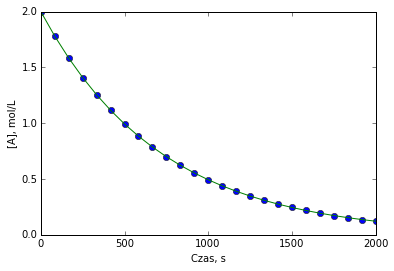

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from scipy.misc import derivative


k = 1.4e-3 # 1/s  

# A -> B, k
def model(y, t):
    a = y[0]
    dadt = -k*a      # da/dt = ka
    return [dadt]

a0 = 2 # mol/L
initial = [a0]         # [A]0 = 1.2 mol/L

t = np.linspace(0, 2000,25) # ts => time

res = odeint( model, initial, t )
a = res[:,0]

#rozwiazanie analityczne
def y(t):
    return a0*np.exp(-k*t)

plt.plot(t,a,'o')
plt.plot(t,y(t),'-')
plt.xlabel('Czas, s')
plt.ylabel('[A], mol/L')

[(0.0, 0.0028),
 (83.333333333333329, 0.0024916690095742465),
 (166.66666666666666, 0.0022172908153332877),
 (250.0, 0.001973126646256707),
 (333.33333333333331, 0.0017558494637828796),
 (416.66666666666663, 0.0015624984445297492),
 (500.0, 0.0013904388865332035),
 (583.33333333333326, 0.0012373262240388968),
 (666.66666666666663, 0.0011010740877845347),
 (750.0, 0.00097982571839167376),
 (833.33333333333326, 0.00087192905498652631),
 (916.66666666666663, 0.00077591376474180128),
 (1000.0, 0.00069047151523161389),
 (1083.3333333333333, 0.00061443801328313341),
 (1166.6666666666665, 0.00054677718650760247),
 (1250.0, 0.00048656705016707653),
 (1333.3333333333333, 0.00043298714051264825),
 (1416.6666666666665, 0.00038530735880576964),
 (1500.0, 0.0003428779912297367),
 (1583.3333333333333, 0.00030512087042236562),
 (1666.6666666666665, 0.0002715214968700805),
 (1750.0, 0.0002416220270713818),
 (1833.3333333333333, 0.00021501503413289216),
 (1916.6666666666665, 0.00019133795714037653),
 (

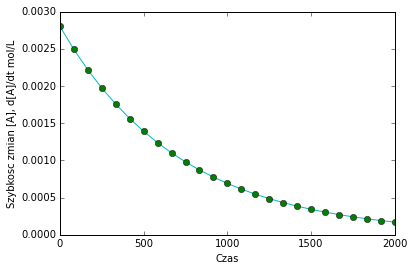

In [10]:
# szybkość zmian stężenia A === "szybkość reakcji" w funkcji czasu

va = k*a
plt.plot(t,va,'c-')
plt.plot(t, -derivative(y, t), 'go')
plt.xlabel('Czas')
plt.ylabel('Szybkosc zmian [A], d[A]/dt mol/L')

# szybkości va po czasie:
zip(t,va)
# czas, va

In [19]:
#res = odeint( model, initial, [0,40])
#a = res[:,0]
#print (a[1] - a[0])/(t[1]-t[0])

# stężenie A po czasie:
zip(t,a)
# czas, [A]

[(0.0, 40.0),
 (24.489795918367346, 39.990669655545965),
 (48.979591836734691, 39.982211642765876),
 (73.469387755102034, 39.97454409239154),
 (97.959183673469383, 39.967592875199841),
 (122.44897959183673, 39.961290836237644),
 (146.93877551020407, 39.955577216306814),
 (171.42857142857142, 39.950396893500283),
 (195.91836734693877, 39.945699968909736),
 (220.40816326530611, 39.941441250390092),
 (244.89795918367346, 39.937579767802788),
 (269.38775510204079, 39.934078404065872),
 (293.87755102040813, 39.930903520254247),
 (318.36734693877548, 39.928024629454605),
 (342.85714285714283, 39.925414101875234),
 (367.34693877551018, 39.923046882813907),
 (391.83673469387753, 39.920900274716587),
 (416.32653061224488, 39.918953699812654),
 (440.81632653061223, 39.917188501662977),
 (465.30612244897958, 39.915587764269461),
 (489.79591836734693, 39.914136153233279),
 (514.28571428571422, 39.912819767212476),
 (538.77551020408157, 39.91162600137644),
 (563.26530612244892, 39.910543427296972),

In [20]:
#print(t[1])

#szybkość chwilowa na początku reakcji (t=...), przybliżenie v0

print (a[0]-a[1])/(t[1]-t[0])


0.000380989065206


### Przykład 2. Kinetyka drugiego rzędu

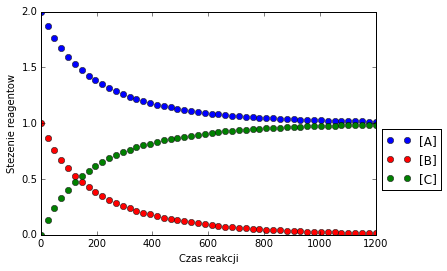

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
from scipy.integrate import odeint


# A + B -> C

def model(y, t):
    
    #a,b, c => stężenia [A] [B] [C]
    a = y[0]
    b = y[1]
    c = y[2]
    
    k1 = 3e-3
    
    #model kinetyczny
    dadt = -k1*a*b
    dbdt = -k1*a*b
    dcdt = k1*a*b
    return [dadt, dbdt, dcdt]


a0=2
b0=1
c0=0

initial = [a0, b0, c0]
t = numpy.linspace(0, 1200) # ts => time

res = odeint( model, initial, t )
a = res[:,0]
b = res[:,1]
c = res[:,2]

plt.plot(t,a,'bo', label='[A]')
plt.plot(t,b,'ro', label='[B]')
plt.plot(t,c,'go', label='[C]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')

**Zadanie 1.** Zbadać zachowanie się modelu dla następującego zestawów danych:

a0 | b0 | c0 | k1
--- | --- | --- | ---
1 | 1 | 0 | 3e-3
1 | 0| 0 | 3e-3
2 | 1| 0 | 3e-3



### Przykład 3. Kinetyka psudopierwszego rzędu



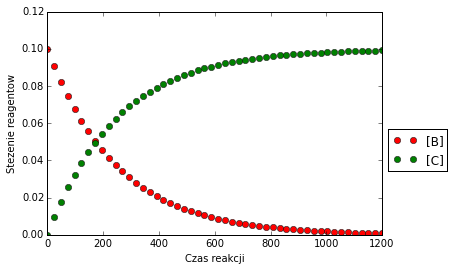

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
from scipy.integrate import odeint


# A + B -> C

def model(y, t):
    
    #a,b => stężenia [A] [B]
    a = y[0]
    b = y[1]
    c = y[2]
    
    k1 = 1e-4
    
    #model kinetyczny
    dadt = -k1*a*b
    dbdt = -k1*a*b
    dcdt = k1*a*b
    return [dadt, dbdt, dcdt]


a0=40
b0=0.1
c0=0

initial = [a0, b0, c0]
t = numpy.linspace(0, 1200) # ts => time

res = odeint( model, initial, t )
a = res[:,0]
b = res[:,1]
c = res[:,2]

#plt.plot(t,a,'bo', label='[A]')
plt.plot(t,b,'ro', label='[B]')
plt.plot(t,c,'go', label='[C]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')
plt.show()

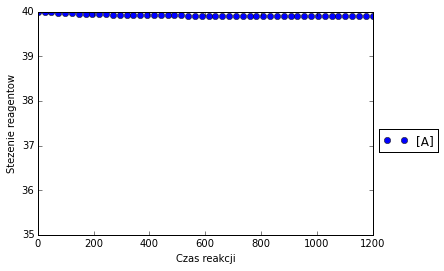

In [15]:
plt.plot(t,a,'bo', label='[A]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')
plt.ylim(35,40) # zakres na osi Y
plt.show()

**Zadanie 2** Jaka jest końcowy stopień konwersji A, a jaki B?

**Zadanie 3** Jak zmieni się szybkość początkowa reakcji gdy [A]0 = 41, 40, 39.8, 39 mol/L ?

In [16]:
alfa_a = 100-100*a[-1]/a[0] #a[-1] ostatni element w vektorze a, -1 to indeks ostatniego elementu
alfa_b = 100-100*b[-1]/b[0] 

print("Konwersja końcowa A: {0:.2f}%, konwersja B: {1:.2f}%".format(alfa_a, alfa_b))


Konwersja końcowa A: 0.25%, konwersja B: 99.17%


In [17]:
#szybkość początkowa 
v0 = (b[1] - b[0])/(t[1]-t[0])


print(v0)

-0.000380989065206


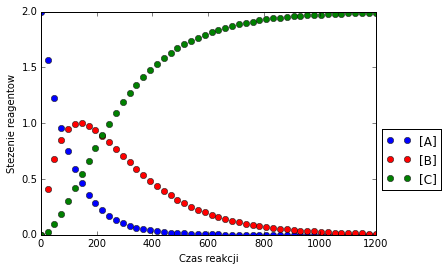

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
from scipy.integrate import odeint


# A -> B -> C

def model(y, t):
    
    #a,b => stężenia [A] [B]
    a = y[0]
    b = y[1]
    c = y[2]
    
    k1 = 1e-2
    k2 = 5e-3
    
    #model kinetyczny
    dadt = -k1*a         # da/dt = -k1a
    dbdt = k1*a - k2*b   # db/dt = k1a-k2b
    dcdt = k2*b          # dc/dt = k2b
    return [dadt, dbdt, dcdt]



initial = [2,0,0]
t = numpy.linspace(0, 1200) # ts => time

res = odeint( model, initial, t )
a = res[:,0]
b = res[:,1]
c = res[:,2]

plt.plot(t,a,'bo', label='[A]')
plt.plot(t,b,'ro', label='[B]')
plt.plot(t,c,'go', label='[C]')
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')

**Zadanie 4.** Opracować model kinetyczny dla reakcji:

1.Równoległych:
$$ A \rightarrow B , k_1=1\cdot10^{-2}$$

$$ A \rightarrow C, k_2=2\cdot10^{-2}$$


2.Równowagowych:

$$ A \rightarrow B, k_1=4\cdot10^{-3} $$
$$ B \rightarrow A, k_2=5\cdot10^{-3} $$

Rozwiązać numerycznie układy równań dla t = 0 ... 1200

### Przykład 4. Kolejne modele kinetyczne


$$ 2A \rightarrow B , k_1=4\cdot10^{-3}$$



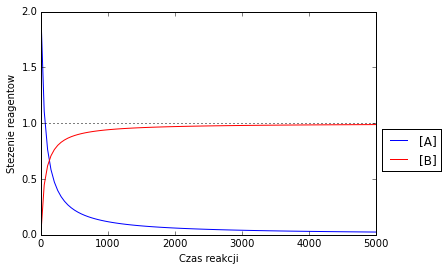

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
from scipy.integrate import odeint


# 2A ---> B, k1
# co jest równoważne:
# A + A -----> B, k1
# czyli:

def model(y, t):
    
    #a,b => stężenia [A] [B]
    a = y[0]
    b = y[1]
    
    k1 = 4e-3
    
    #model kinetyczny
    dadt = -k1*a*a - k1*a*a
    dbdt = k1*a*a
    return [dadt, dbdt]


a0=2
b0=0

ts = 0
te = 5000

initial = [a0,b0]
t = numpy.linspace(ts, te,100)

res = odeint( model, initial, t )
a = res[:,0]
b = res[:,1]


plt.plot(t,a,'b-', label='[A]')
plt.plot(t,b,'r-', label='[B]')
plt.plot((ts, te),(0.5*a0, 0.5*a0),'k:')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')


In [27]:
# sprawdzenie --- bilans masy

print(a + 2*b)

[ 2.024       2.02522154  2.02656652  2.02804723  2.02967711  2.03147092
  2.03344481  2.03561643  2.03800509  2.04063188  2.04351976  2.04669384
  2.0501814   2.05401208  2.0582181   2.06283433  2.06789852  2.0734514
  2.07953684  2.08620199  2.09349735  2.10147686  2.1101979   2.11972134
  2.13011139  2.14143546  2.15376397  2.16716996  2.18172865  2.19751682
  2.21461209  2.233092    2.25303289  2.27450869  2.29758938  2.32233944
  2.34881595  2.37706669  2.40712808  2.43902306  2.47275893  2.50832543
  2.5456928   2.58481027  2.62560481  2.66798043  2.71181798  2.75697564
  2.80329001  2.85057802  2.89863941  2.94725988  2.99621474  3.04527306
  3.09420191  3.14277082  3.1907561   3.23794483  3.28413852  3.3291562
  3.37283682  3.41504097  3.45565217  3.49457702  3.53174495  3.5671077
  3.60063773  3.63232683  3.66218419  3.69023435  3.7165151   3.74107535
  3.76397313  3.7852736   3.80504727  3.8233684   3.84031354  3.85596028
  3.87038618  3.8836679   3.89588043  3.90709653  3.91

---

$$ 2A \rightarrow B, k_1=8\cdot10^{-4} $$
$$ B \rightarrow 2A, k_2=2\cdot10^{-4} $$

$$ t = 0 ... 5000 $$

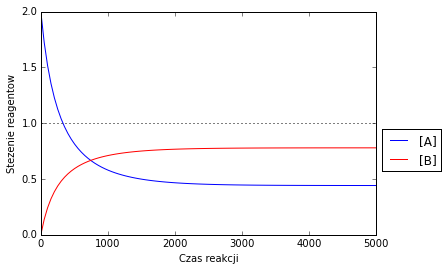

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
from scipy.integrate import odeint


# 2A <---> B, k1, k2
# co jest równoważne:
# A + A -----> B, k1
# B -----> A + A, k2
# czyli:

def model(y, t):
    
    #a,b => stężenia [A] [B]
    a = y[0]
    b = y[1]
    
    k1 = 8e-4
    k2 = 2e-4
    
    #model kinetyczny
    dadt = -k1*a*a - k1*a*a + k2*b + k2*b
    dbdt = k1*a*a - k2*b
    return [dadt, dbdt]


a0=2
b0=0

ts = 0
te = 5000

initial = [a0,b0]
t = numpy.linspace(ts, te,100)

res = odeint( model, initial, t )
a = res[:,0]
b = res[:,1]


plt.plot(t,a,'b-', label='[A]')
plt.plot(t,b,'r-', label='[B]')
plt.plot((ts, te),(0.5*a0, 0.5*a0),'k:')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')


In [24]:
# sprawdzenie == bilans masy
# czy [A] + 2*[B] = const ?
print(a+2*b)

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]


### Przykład 5. Reakcje autokatalityczne

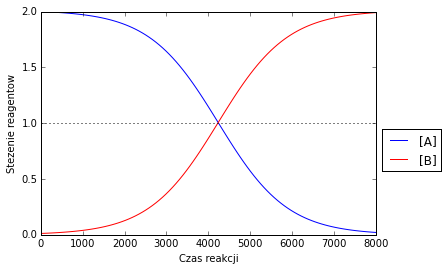

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy
from scipy.integrate import odeint

# Autocatalytic reactions are those in which at least one of the products is a reactant.
# A + B ---> 2B k1

k1 = 6e-4

def model(y, t):
    
    #a,b => stężenia [A] [B]
    a = y[0]
    b = y[1]
    
    #model kinetyczny
    dadt = -k1*a*b
    dbdt =  k1*a*b    
    return [dadt, dbdt]


a0=2
b0=0.012

ts = 0
te = 8000

initial = [a0,b0]
t = numpy.linspace(ts, te,100)

res = odeint( model, initial, t )
a = res[:,0]
b = res[:,1]


plt.plot(t,a,'b-', label='[A]')
plt.plot(t,b,'r-', label='[B]')
plt.plot((ts, te),(0.5*a0, 0.5*a0),'k:')

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Czas reakcji')
plt.ylabel('Stezenie reagentow')


**Zadanie 5.** Prześledzić zależność szybkości reakcji autokatalitycznej v w funkcji czasu (sporządzić wykres). Czy zaobserwowane zjawisko jest sprzeczne z prawami kinetyki chemicznej?

Odpowiedź jest poniżej - zajrzeć w ostateczności ...

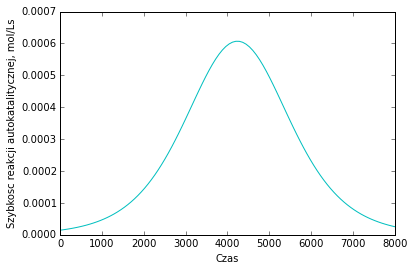

In [28]:
plt.plot(t,k1*a*b, 'c-')
plt.xlabel('Czas')
plt.ylabel('Szybkosc reakcji autokatalitycznej, mol/Ls')